In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_train = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

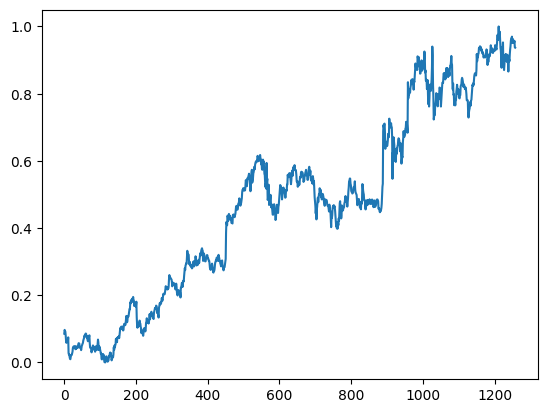

In [5]:
plt.plot(train_scaled)
plt.show()

In [6]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1208, 50, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.1001
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0067
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0050
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0048
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0043
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0056
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0044
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0042
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0048
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0046
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0037
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - lo

In [9]:
dataset_test = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
real_stock_price = dataset_test.loc[:70, ["Open"]].values
real_stock_price

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04],
       [313.7 ],
       [310.59],
       [314.43],
       [311.96],
       [314.81],
       [312.14],
       [319.3 ],
       [294.16],
       [291.91],
       [292.07],
       [287.68],
       [284.92],
       [284.32],
       [287.95],
       [290.41],
       [291.38],
       [291.34],
       [294.23],
       [296.39],
       [302.44],
       [303.18],
       [304.87],
       [302.81],
       [304.11],
       [304.63],
       [305.32],
       [300.28],
       [301.36],
       [300.81],
       [304.84],
       [302.37],
       [302.54],
       [302.16],
       [303.86],
       [308.14],
       [309.97],
       [309.84],
       [309.06],
       [302.89],
       [303.39],
       [303.88],
       [302.84],
       [298.88],
       [303.24],
       [306.35],
       [307.15],
       [309.29],
       [310.4 ],
       [314.28],
       [316.12],
       [318.06],
       [322.09],
       [321.3 ],
       [322.31

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step


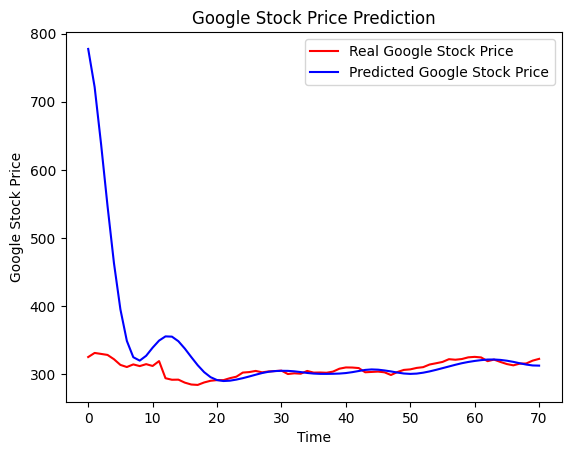

In [12]:
X_test = []
for i in range(timesteps, 121):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()